In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


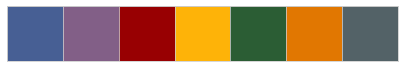

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# set option for palette argument
my_palette = ['xkcd:' + c for c in mp.my_colors]

In [6]:
# read in dataset
df = pd.read_json('./data/capstone2_ds.json')

In [7]:
# observe dataset dimensionality
df.shape

(11693, 28)

In [8]:
# assign better name to target
df.rename(columns={'revenue': 'actor_value'}, inplace=True)

In [9]:
# change gender labels
df['gender'].replace([0, 1], ['male', 'female'], inplace=True)

In [10]:
# observe a bit of the data
df.iloc[:3, :11]

,actor_value,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
2,1.032727e+09,8.725710e+07,46.683803,male,0.818182,44.132909,1997.818182,112.818182,1,7.145455,6030.272727
3,4.376895e+08,8.557983e+07,55.134863,male,0.761905,25.411429,1997.190476,119.000000,1,6.730952,2992.928571
4,7.803955e+08,7.547966e+07,40.177873,female,3.000000,32.998267,1996.466667,115.200000,1,6.660000,4516.866667


I will categorize the actors with respect to their earning history.<br>
Top actors will be the upper 10% of the profitability figures.<br>
Elite actors will be the top 1% of that category.

In [11]:
# extract top profitable actors
top_df = df[df['actor_value'] >= df['actor_value'].quantile(0.9)]

In [12]:
# extract elite profitable actors
elite_df = df[df['actor_value'] >= df['actor_value'].quantile(0.99)]

In [13]:
# recall features
df.columns

Index(['actor_value', 'budget', 'age', 'gender', 'order', 'popularity',
       'release_date', 'runtime', 'usa', 'vote_average', 'vote_count',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

In [14]:
# create list of non-genre feature names
non_genre_lst = ['actor_value', 'budget', 'age', 'gender', 'order', 'popularity',
                 'release_date', 'runtime', 'usa', 'vote_average', 'vote_count']

In [15]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

In [16]:
# observe non-genre statistics for all actors
df[non_genre_lst].describe()

,actor_value,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.169300e+04,1.169300e+04,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000,11693.000000
mean,1.386641e+08,3.952939e+07,37.860803,4.420431,13.258343,1996.124671,107.950944,0.445224,6.403431,1309.308174
std,2.847504e+08,3.619484e+07,14.003562,2.109674,8.071933,20.294316,17.639757,0.497012,0.844907,1735.875529
min,1.238841e+00,1.600217e+00,1.182776,0.000000,0.600000,1913.000000,70.000000,0.000000,1.000000,1.000000
25%,2.466701e+07,1.353750e+07,27.874631,3.000000,9.088500,1988.000000,96.500000,0.000000,5.953846,216.000000
50%,7.589722e+07,3.131368e+07,36.148586,4.500000,12.872000,2002.600000,105.666667,0.000000,6.400000,726.000000
75%,1.614848e+08,5.495930e+07,46.733335,6.000000,16.150000,2010.416667,116.000000,1.000000,6.885714,1730.500000
max,7.377968e+09,3.196471e+08,98.961649,8.000000,205.280000,2020.000000,248.000000,1.000000,10.000000,22613.000000


In [17]:
# observe non-genre statistics for top profitable actors
top_df[non_genre_lst].describe()

,actor_value,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.170000e+03,1.170000e+03,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,6.354168e+08,8.633366e+07,38.828172,4.558882,21.395838,1993.005004,117.954573,0.402564,6.832126,3940.056806
std,6.969294e+08,5.575013e+07,14.858678,2.106576,9.679618,21.769839,23.425197,0.490624,0.626914,3117.686476
min,2.985497e+08,9.290282e+04,7.126772,0.000000,0.620000,1925.000000,70.000000,0.000000,4.300000,55.000000
25%,3.549205e+08,4.280756e+07,28.498190,3.000000,15.620875,1978.000000,103.616667,0.000000,6.400000,1653.400000
50%,4.347634e+08,7.949849e+07,37.899478,4.750000,20.200000,1998.875000,116.000000,0.000000,6.800000,3465.000000
75%,6.285777e+08,1.172288e+08,48.153624,6.000000,24.948250,2011.000000,128.000000,1.000000,7.250000,5184.750000
max,7.377968e+09,3.196471e+08,87.377564,8.000000,151.912000,2019.000000,248.000000,1.000000,8.600000,22613.000000


In [18]:
# observe non-genre statistics for elite profitable actors
elite_df[non_genre_lst].describe()

,actor_value,budget,age,order,popularity,release_date,runtime,usa,vote_average,vote_count
count,1.170000e+02,1.170000e+02,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,2.130374e+09,8.490262e+07,37.804074,4.326254,28.758341,1972.847540,118.773599,0.418803,7.224246,5493.985481
std,1.469897e+09,7.376764e+07,17.412786,2.433408,16.387339,27.993023,39.986899,0.495485,0.460768,3633.774949
min,9.613917e+08,1.342198e+07,7.994688,0.000000,9.462429,1938.000000,70.000000,0.000000,5.700000,456.428571
25%,1.147836e+09,3.185249e+07,24.287973,2.333333,21.217000,1944.875000,83.000000,0.000000,7.000000,3338.000000
50%,1.554221e+09,4.793564e+07,36.011691,4.000000,24.373333,1965.000000,118.000000,0.000000,7.100000,4399.000000
75%,2.508996e+09,1.428120e+08,48.753910,6.000000,33.029000,1999.000000,134.500000,1.000000,7.500000,7642.000000
max,7.377968e+09,3.196471e+08,87.377564,8.000000,151.912000,2019.000000,233.000000,1.000000,8.300000,16794.000000


In [19]:
# observe genre statistics for all actors
df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,11693.0,0.972975,1.975938,0.0,0.0,0.0,1.0,38.0
adventure,11693.0,0.673993,1.441506,0.0,0.0,0.0,1.0,23.0
animation,11693.0,0.181048,0.658617,0.0,0.0,0.0,0.0,11.0
comedy,11693.0,1.279826,2.489980,0.0,0.0,1.0,1.0,34.0
crime,11693.0,0.582571,1.364646,0.0,0.0,0.0,1.0,27.0
drama,11693.0,1.644146,2.809986,0.0,0.0,1.0,2.0,33.0
family,11693.0,0.381681,0.982726,0.0,0.0,0.0,0.0,15.0
fantasy,11693.0,0.363636,0.901201,0.0,0.0,0.0,0.0,17.0
history,11693.0,0.156931,0.521274,0.0,0.0,0.0,0.0,9.0
horror,11693.0,0.397674,0.773581,0.0,0.0,0.0,1.0,11.0


In [20]:
# observe genre statistics for top profitable actors
top_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,1170.0,1.330769,2.612890,0.0,0.0,1.0,1.0,38.0
adventure,1170.0,1.417949,2.288182,0.0,0.0,1.0,2.0,23.0
animation,1170.0,0.435897,1.008812,0.0,0.0,0.0,1.0,8.0
comedy,1170.0,1.191453,2.452128,0.0,0.0,0.0,1.0,32.0
crime,1170.0,0.411111,1.275972,0.0,0.0,0.0,0.0,24.0
drama,1170.0,1.361538,2.751167,0.0,0.0,1.0,1.0,28.0
family,1170.0,0.701709,1.373991,0.0,0.0,0.0,1.0,11.0
fantasy,1170.0,0.711111,1.453104,0.0,0.0,0.0,1.0,17.0
history,1170.0,0.172650,0.578429,0.0,0.0,0.0,0.0,7.0
horror,1170.0,0.235043,0.565900,0.0,0.0,0.0,0.0,6.0


In [21]:
# observe genre statistics for elite actors
elite_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,117.0,0.512821,1.103407,0.0,0.0,0.0,1.0,8.0
adventure,117.0,0.931624,1.311267,0.0,0.0,1.0,1.0,8.0
animation,117.0,0.581197,0.832935,0.0,0.0,0.0,1.0,5.0
comedy,117.0,0.188034,0.434139,0.0,0.0,0.0,0.0,2.0
crime,117.0,0.034188,0.224823,0.0,0.0,0.0,0.0,2.0
drama,117.0,0.401709,0.956465,0.0,0.0,0.0,1.0,6.0
family,117.0,0.700855,0.843484,0.0,0.0,1.0,1.0,5.0
fantasy,117.0,0.487179,0.987992,0.0,0.0,0.0,1.0,8.0
history,117.0,0.042735,0.241874,0.0,0.0,0.0,0.0,2.0
horror,117.0,0.119658,0.375141,0.0,0.0,0.0,0.0,2.0


There are some trend in the data.<br>
I will explore a few of them with visualizations.

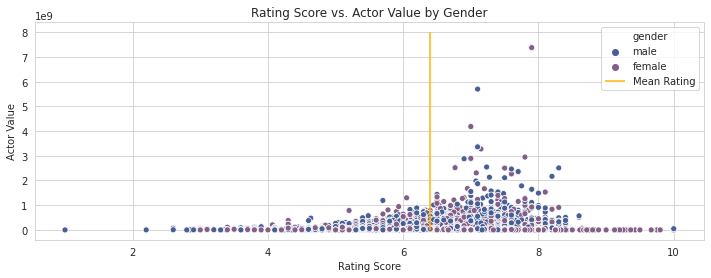

In [22]:
# plot rating score vs. actor value by gender

sns.scatterplot(x='vote_average', y='actor_value', hue='gender', data=df, 
               palette=my_palette[:2])

plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=8e9, 
           colors=mp.colors(3), label='Mean Rating')

plt.xlabel('Rating Score')
plt.ylabel('Actor Value')

plt.legend()
plt.title('Rating Score vs. Actor Value by Gender');

The actors with the highest average movie revenue act in movies that have higher ratings.<br>
The actors with the largest average movie revenues are evenly distributed between male and female actors.

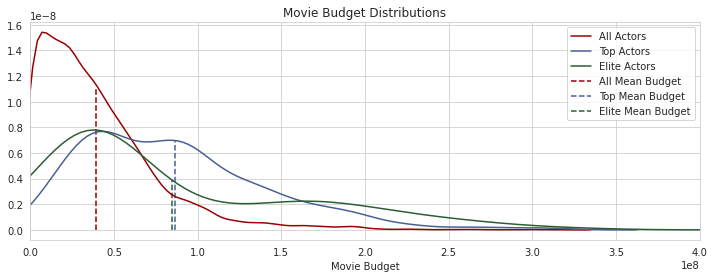

In [23]:
# plot movie budget distributions for actor classes

plt.xlim(0, 4e8)

sns.kdeplot(df['budget'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['budget']), ymin=0, ymax=1.1e-8, color=mp.colors(2), 
           label='All Mean Budget', linestyles='dashed')

sns.kdeplot(top_df['budget'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['budget']), ymin=0, ymax=7e-9, color=mp.colors(0), 
          label='Top Mean Budget', linestyles='dashed')

sns.kdeplot(elite_df['budget'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['budget']), ymin=0, ymax=3.9e-9, color=mp.colors(4), 
          label='Elite Mean Budget', linestyles='dashed')

plt.xlabel('Movie Budget')
plt.legend()
plt.title('Movie Budget Distributions');

The average movie budgets increase as we go from all actors to the most elite ones.<br>
It makes sense that larger budgets would result in larger revenues.

Average movie budgets for both the top and elite actors are bimodal.<br>
The mean values of the movie budgets for both groups of actors are close to each other.<br>
The difference is that the second mode of the elite actor distribution is shifted to higher budgets.

The average movie budget for all actors is generally below one hundred million dollars.

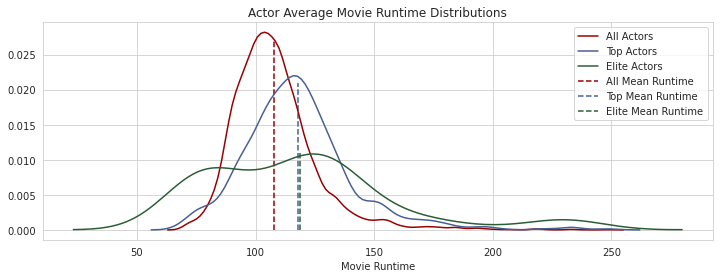

In [24]:
# plot runtime distributions for actor classes

sns.kdeplot(df['runtime'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['runtime']), ymin=0, ymax=0.027, color=mp.colors(2), 
           label='All Mean Runtime', linestyles='dashed')

sns.kdeplot(top_df['runtime'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['runtime']), ymin=0, ymax=0.021, color=mp.colors(0), 
          label='Top Mean Runtime', linestyles='dashed')

sns.kdeplot(elite_df['runtime'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['runtime']), ymin=0, ymax=0.011, color=mp.colors(4), 
          label='Elite Mean Runtime', linestyles='dashed')

plt.xlabel('Movie Runtime')
plt.legend()
plt.title('Actor Average Movie Runtime Distributions');

The average runtime for all actors is constrained between an hour and a half and two hours.<br>
Elite actors have a fairly even distribution throughout the range of their average movie runtime.<br>
Their distribution has an additional mode for movies with runtimes greater than three hours.<br>
There may be a positive correlation between runtime and revenue.

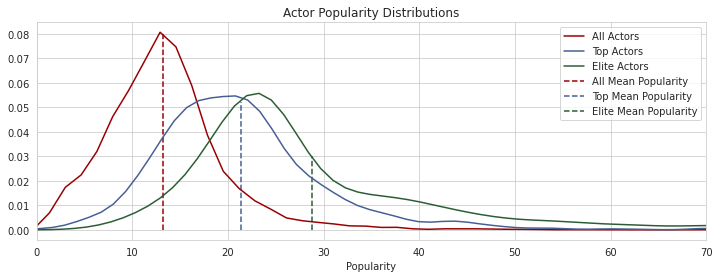

In [25]:
# plot actor popularity distributions for actor classes

plt.xlim(0, 70)

sns.kdeplot(df['popularity'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['popularity']), ymin=0, ymax=0.08, color=mp.colors(2), 
           label='All Mean Popularity', linestyles='dashed')

sns.kdeplot(top_df['popularity'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['popularity']), ymin=0, ymax=0.052, color=mp.colors(0), 
          label='Top Mean Popularity', linestyles='dashed')

sns.kdeplot(elite_df['popularity'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['popularity']), ymin=0, ymax=0.03, color=mp.colors(4), 
          label='Elite Mean Popularity', linestyles='dashed')

plt.xlabel('Popularity')
plt.legend()
plt.title('Actor Popularity Distributions');

Popularity is a TMDb proprietary ranking determined by website activity pertaining to the actors.<br>
The average actor popularity increases as we go from all actors to the most elite ones.

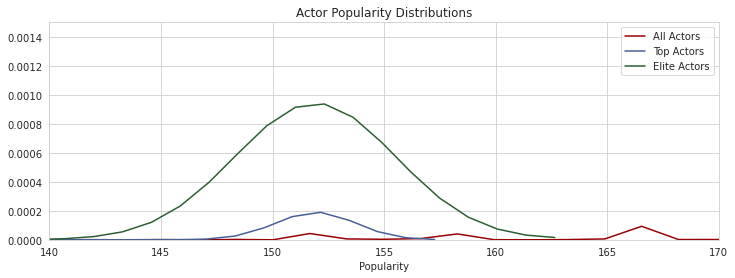

In [26]:
# plot actor popularity distributions for actor classes

plt.xlim(140, 170)
plt.ylim(0, 0.0015)

sns.kdeplot(df['popularity'],color=mp.colors(2), label='All Actors')

sns.kdeplot(top_df['popularity'], color=mp.colors(0),label='Top Actors')

sns.kdeplot(elite_df['popularity'], color=mp.colors(4),label='Elite Actors')


plt.xlabel('Popularity')
plt.legend()
plt.title('Actor Popularity Distributions');

Zooming in to a higher range, I can see there is a second mode in the elite distribution.

In [27]:
# read in actor reference dataset
actor_df = pd.read_json('./data/capstone2_ref.json')

In [28]:
# extract elite actors in second mode of popularity distribution
actor_df[actor_df['person_id'].isin((
    elite_df[(elite_df['popularity'] > 140) & (
        elite_df['popularity'] < 160)].index))].drop(genre_lst, axis=1)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
40459,1537686,Naomi Ackie,181812,Star Wars: The Rise of Skywalker,1.078371e+09,2.511100e+08,8.272614e+08,27.124445,1,7,151.912,2019,142,0,6.5,4399


Naomi Ackie is only in one movie in this dataset.<br>
I can see how one actor can show up as an anomoly.<br>
Given the small number of elite actors, it is not surprising that second modes are appering in their distributions.

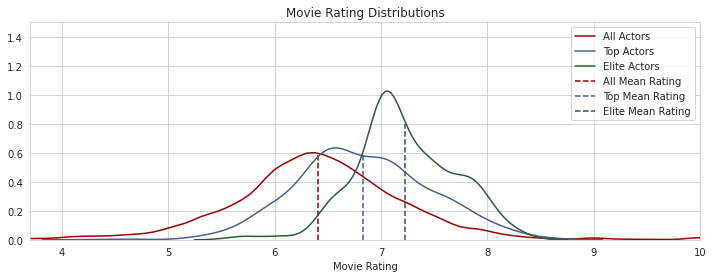

In [29]:
# plot movie rating distributions for actor classes

plt.xlim(3.7, 10)
plt.ylim(0, 1.5)

sns.kdeplot(df['vote_average'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=0.6, color=mp.colors(2), 
           label='All Mean Rating', linestyles='dashed')

sns.kdeplot(top_df['vote_average'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['vote_average']), ymin=0, ymax=0.6, color=mp.colors(0), 
          label='Top Mean Rating', linestyles='dashed')

sns.kdeplot(elite_df['vote_average'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['vote_average']), ymin=0, ymax=0.8, color=mp.colors(4), 
          label='Elite Mean Rating', linestyles='dashed')

plt.xlabel('Movie Rating')
plt.legend()
plt.title('Movie Rating Distributions');

The average movie rating increases as we go from all actors to the most elite ones.<br>
The distribution for all actors has a wide spread throughout the ratings.<br>
This points to reviewers agreeing more about which actors are elite.<br>
There is a greater uncertainty when it comes to the ratings of movies of the average actor.

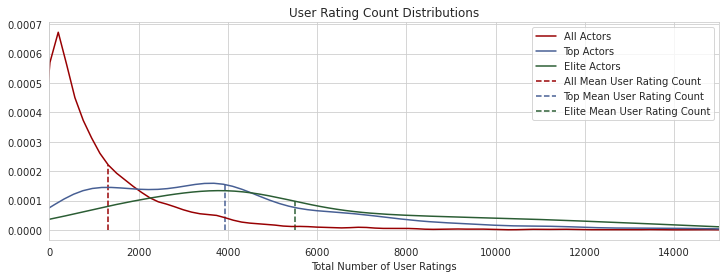

In [30]:
# plot total number of user ratings distributions for actor classes

plt.xlim(0, 15e3)
#plt.ylim(0, 4e-5)

sns.kdeplot(df['vote_count'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['vote_count']), ymin=0, ymax=2.2e-4, color=mp.colors(2), 
           label='All Mean User Rating Count', linestyles='dashed')

sns.kdeplot(top_df['vote_count'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['vote_count']), ymin=0, ymax=1.6e-4, color=mp.colors(0), 
          label='Top Mean User Rating Count', linestyles='dashed')

sns.kdeplot(elite_df['vote_count'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['vote_count']), ymin=0, ymax=1e-4, color=mp.colors(4), 
          label='Elite Mean User Rating Count', linestyles='dashed')

plt.xlabel('Total Number of User Ratings')
plt.legend()
plt.title('User Rating Count Distributions');

The average number of total user ratings increases as we go from all actors to the most elite ones.<br>
This supports the idea that name recognition will drive revenue numbers.<br>
This is commonly referred to as star power.

There are clear trends that will be helpful for making predictions about which actors will have the highest revenue totals.

Now, I will rank the actors by their tier.

In [31]:
# create top actor binary feature
df['is_top'] = df['actor_value'].transform(
    lambda x: int(x >= np.min(top_df['actor_value']) ))

In [32]:
# create elite actor binary feature
df['is_elite'] = df['actor_value'].transform(
    lambda x: int(x >= np.min(elite_df['actor_value']) ))

In [33]:
# create actor rank feature
df['rank'] = df['is_top'] + df['is_elite']

In [34]:
# observe DataFrame without looking at genres
df.drop(genre_lst, axis=1).head(3)

,actor_value,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count,is_top,is_elite,rank
2,1.032727e+09,8.725710e+07,46.683803,male,0.818182,44.132909,1997.818182,112.818182,1,7.145455,6030.272727,1,1,2
3,4.376895e+08,8.557983e+07,55.134863,male,0.761905,25.411429,1997.190476,119.000000,1,6.730952,2992.928571,1,0,1
4,7.803955e+08,7.547966e+07,40.177873,female,3.000000,32.998267,1996.466667,115.200000,1,6.660000,4516.866667,1,0,1


The rank feature has values of 2 for the elite 1%, 1 for top 10%, and 0 for all other actors.

In [35]:
# combine genres into feature and sum over each tier of actors
genre_count_df = pd.melt(df, 
                   id_vars=['gender', 'is_top', 'is_elite'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'all_actors')

In [36]:
# drop observations without genre
genre_count_df = genre_count_df.loc[genre_count_df['all_actors'] > 0]

In [37]:
# group tiered actors by genres of their films
genre_count_df = genre_count_df.groupby('genre', as_index=False).agg(sum)

In [38]:
# observe DataFrame
genre_count_df.head(3)

,genre,is_top,is_elite,all_actors
0,action,617,36,11377
1,adventure,692,68,7881
2,animation,296,53,2117


Now, I have the actors grouped by their movie genres and tiers.

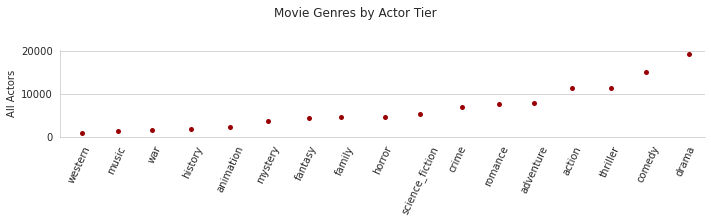

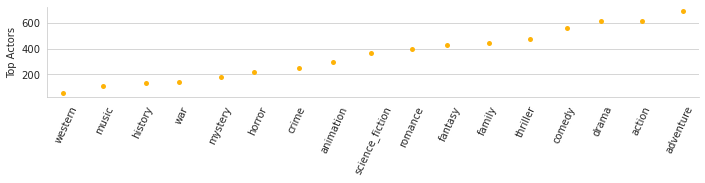

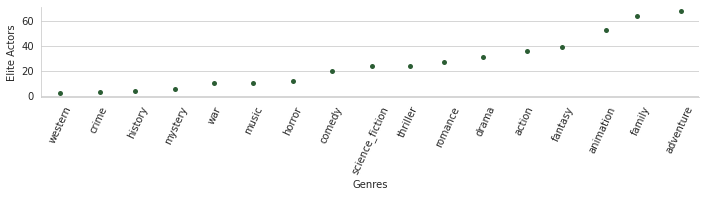

In [39]:
# plot genres by actor ranks

ax = sns.catplot(data=genre_count_df.sort_values('all_actors'), 
                 x='genre', y='all_actors', height=2, aspect=5, 
                 color=mp.colors(2), label='All Actors').set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('All Actors')

sns.catplot(data=genre_count_df.sort_values('is_top'), x='genre', y='is_top', 
            height=2, aspect=5, color=mp.colors(3)).set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('Top Actors')

sns.catplot(data=genre_count_df.sort_values('is_elite'), x='genre', y='is_elite', 
            height=2, aspect=5, color=mp.colors(4)).set_xticklabels(rotation=65)
plt.xlabel('Genres')
plt.ylabel('Elite Actors')

ax.fig.suptitle('Movie Genres by Actor Tier', y=1.2);

The importances of comedy and drama movies decline once we get to the elite actors.<br>
Western, war, and history movies are consistantly at the bottom of earning options for any tiered actor.

Three genres are elevated by the elite tier actors, adventure, family, and animation.

In [40]:
# extract elite actors in more than 2 adventure movies
_df = actor_df[actor_df['person_id'].isin(
    elite_df[elite_df['adventure'] > 2].index)]
# sort by revenue and drop movies not in genre category
_df[_df['adventure'] > 0].drop(genre_lst, axis=1).sort_values('revenue', ascending=False)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
26924,34759,Sterling Holloway,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.560847,0,3,28.816,1951,75,1,7.1,3949
72,6,Anthony Daniels,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,31.255946,0,5,90.645,1977,121,0,8.2,13502
24614,24343,Peter Mayhew,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,33.016421,0,7,90.645,1977,121,0,8.2,13502
701,130,Kenny Baker,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,42.752418,0,6,90.645,1977,121,0,8.2,13502
1,2,Mark Hamill,11,Star Wars,3.319102e+09,4.708566e+07,3.272016e+09,25.665140,0,0,90.645,1977,121,1,8.2,13502
40090,1315036,Daisy Ridley,140607,Star Wars: The Force Awakens,2.257011e+09,2.673636e+08,1.989647e+09,23.680158,1,4,50.161,2015,136,0,7.4,14329
6,2,Mark Hamill,140607,Star Wars: The Force Awakens,2.257011e+09,2.673636e+08,1.989647e+09,64.223085,0,1,50.161,2015,136,1,7.4,14329
73,6,Anthony Daniels,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,34.243003,0,4,35.358,1980,124,0,8.4,11403
5,2,Mark Hamill,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,28.652197,0,0,35.358,1980,124,1,8.4,11403
702,130,Kenny Baker,1891,The Empire Strikes Back,1.698889e+09,5.679792e+07,1.642091e+09,45.739474,0,8,35.358,1980,124,0,8.4,11403


Some big adventure series movies can be credited with the prominence of this genre with the elite actors.<br>
Dominic Monaghan was in two of the big adventure series, X-Men and The Lord of the Rings.

In [41]:
# extract elite actors in more than 2 family movies
_df = actor_df[actor_df['person_id'].isin(
    elite_df[elite_df['family'] > 2].index)]
# sort by revenue and drop movies not in genre category
_df[_df['family'] > 0].drop(genre_lst, axis=1).sort_values('revenue', ascending=False)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
25768,29283,Richard Haydn,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.382883,0,2,28.816,1951,75,0,7.1,3949
26924,34759,Sterling Holloway,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.560847,0,3,28.816,1951,75,1,7.1,3949
32955,67230,Bill Thompson,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,38.054169,0,7,28.816,1951,75,1,7.1,3949
32966,67290,Verna Felton,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,61.019733,1,5,28.816,1951,75,1,7.1,3949
32967,67290,Verna Felton,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,59.593284,1,2,23.993,1950,74,1,7.0,4411
25769,29283,Richard Haydn,15121,The Sound of Music,2.360262e+09,6.762118e+07,2.292641e+09,60.053252,0,3,18.195,1965,175,0,7.7,1971
26923,34759,Sterling Holloway,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,62.785683,0,4,22.601,1967,78,1,7.3,4275
32964,67290,Verna Felton,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,77.244570,1,7,22.601,1967,78,1,7.3,4275
32957,67230,Bill Thompson,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,41.955687,0,3,26.949,1955,76,1,7.1,3439
32965,67290,Verna Felton,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,64.921251,1,6,26.949,1955,76,1,7.1,3439


In [42]:
# extract elite actors in more than 2 animation movies
_df = actor_df[actor_df['person_id'].isin(
    elite_df[elite_df['animation'] > 2].index)]
# sort by revenue and drop movies not in genre category
_df[_df['animation'] > 0].drop(genre_lst, axis=1).sort_values('revenue', ascending=False)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
26924,34759,Sterling Holloway,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,46.560847,0,3,28.816,1951,75,1,7.1,3949
32955,67230,Bill Thompson,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,38.054169,0,7,28.816,1951,75,1,7.1,3949
32966,67290,Verna Felton,12092,Alice in Wonderland,5.700455e+09,2.989749e+07,5.670557e+09,61.019733,1,5,28.816,1951,75,1,7.1,3949
32967,67290,Verna Felton,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,59.593284,1,2,23.993,1950,74,1,7.0,4411
26923,34759,Sterling Holloway,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,62.785683,0,4,22.601,1967,78,1,7.3,4275
32964,67290,Verna Felton,9325,The Jungle Book,1.576597e+09,3.063680e+07,1.545960e+09,77.244570,1,7,22.601,1967,78,1,7.3,4275
32957,67230,Bill Thompson,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,41.955687,0,3,26.949,1955,76,1,7.1,3439
32965,67290,Verna Felton,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,64.921251,1,6,26.949,1955,76,1,7.1,3439
32956,67230,Bill Thompson,10693,Peter Pan,8.513378e+08,3.896075e+07,8.123770e+08,39.581922,0,3,27.362,1953,77,1,7.2,3593
32958,67230,Bill Thompson,10882,Sleeping Beauty,4.554971e+08,5.358789e+07,4.019092e+08,45.613531,0,7,24.178,1959,75,1,6.9,3465


As big revenue animation movies are generally family movies, these actors elevated both genres with the same films.

In [43]:
# combine genres into feature and sum over all actors
gender_rank_df = pd.melt(df, 
                   id_vars=['gender', 'rank'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'count')

In [44]:
# drop observations without genre
gender_rank_df = gender_rank_df.loc[gender_rank_df['count'] > 0]

In [45]:
# observe DataFrame
gender_rank_df.head(3)

,gender,rank,genre,count
0,male,2,action,8
1,male,1,action,18
2,female,1,action,6


Now, I have the actors grouped by their movie genres, genders, and ranks.

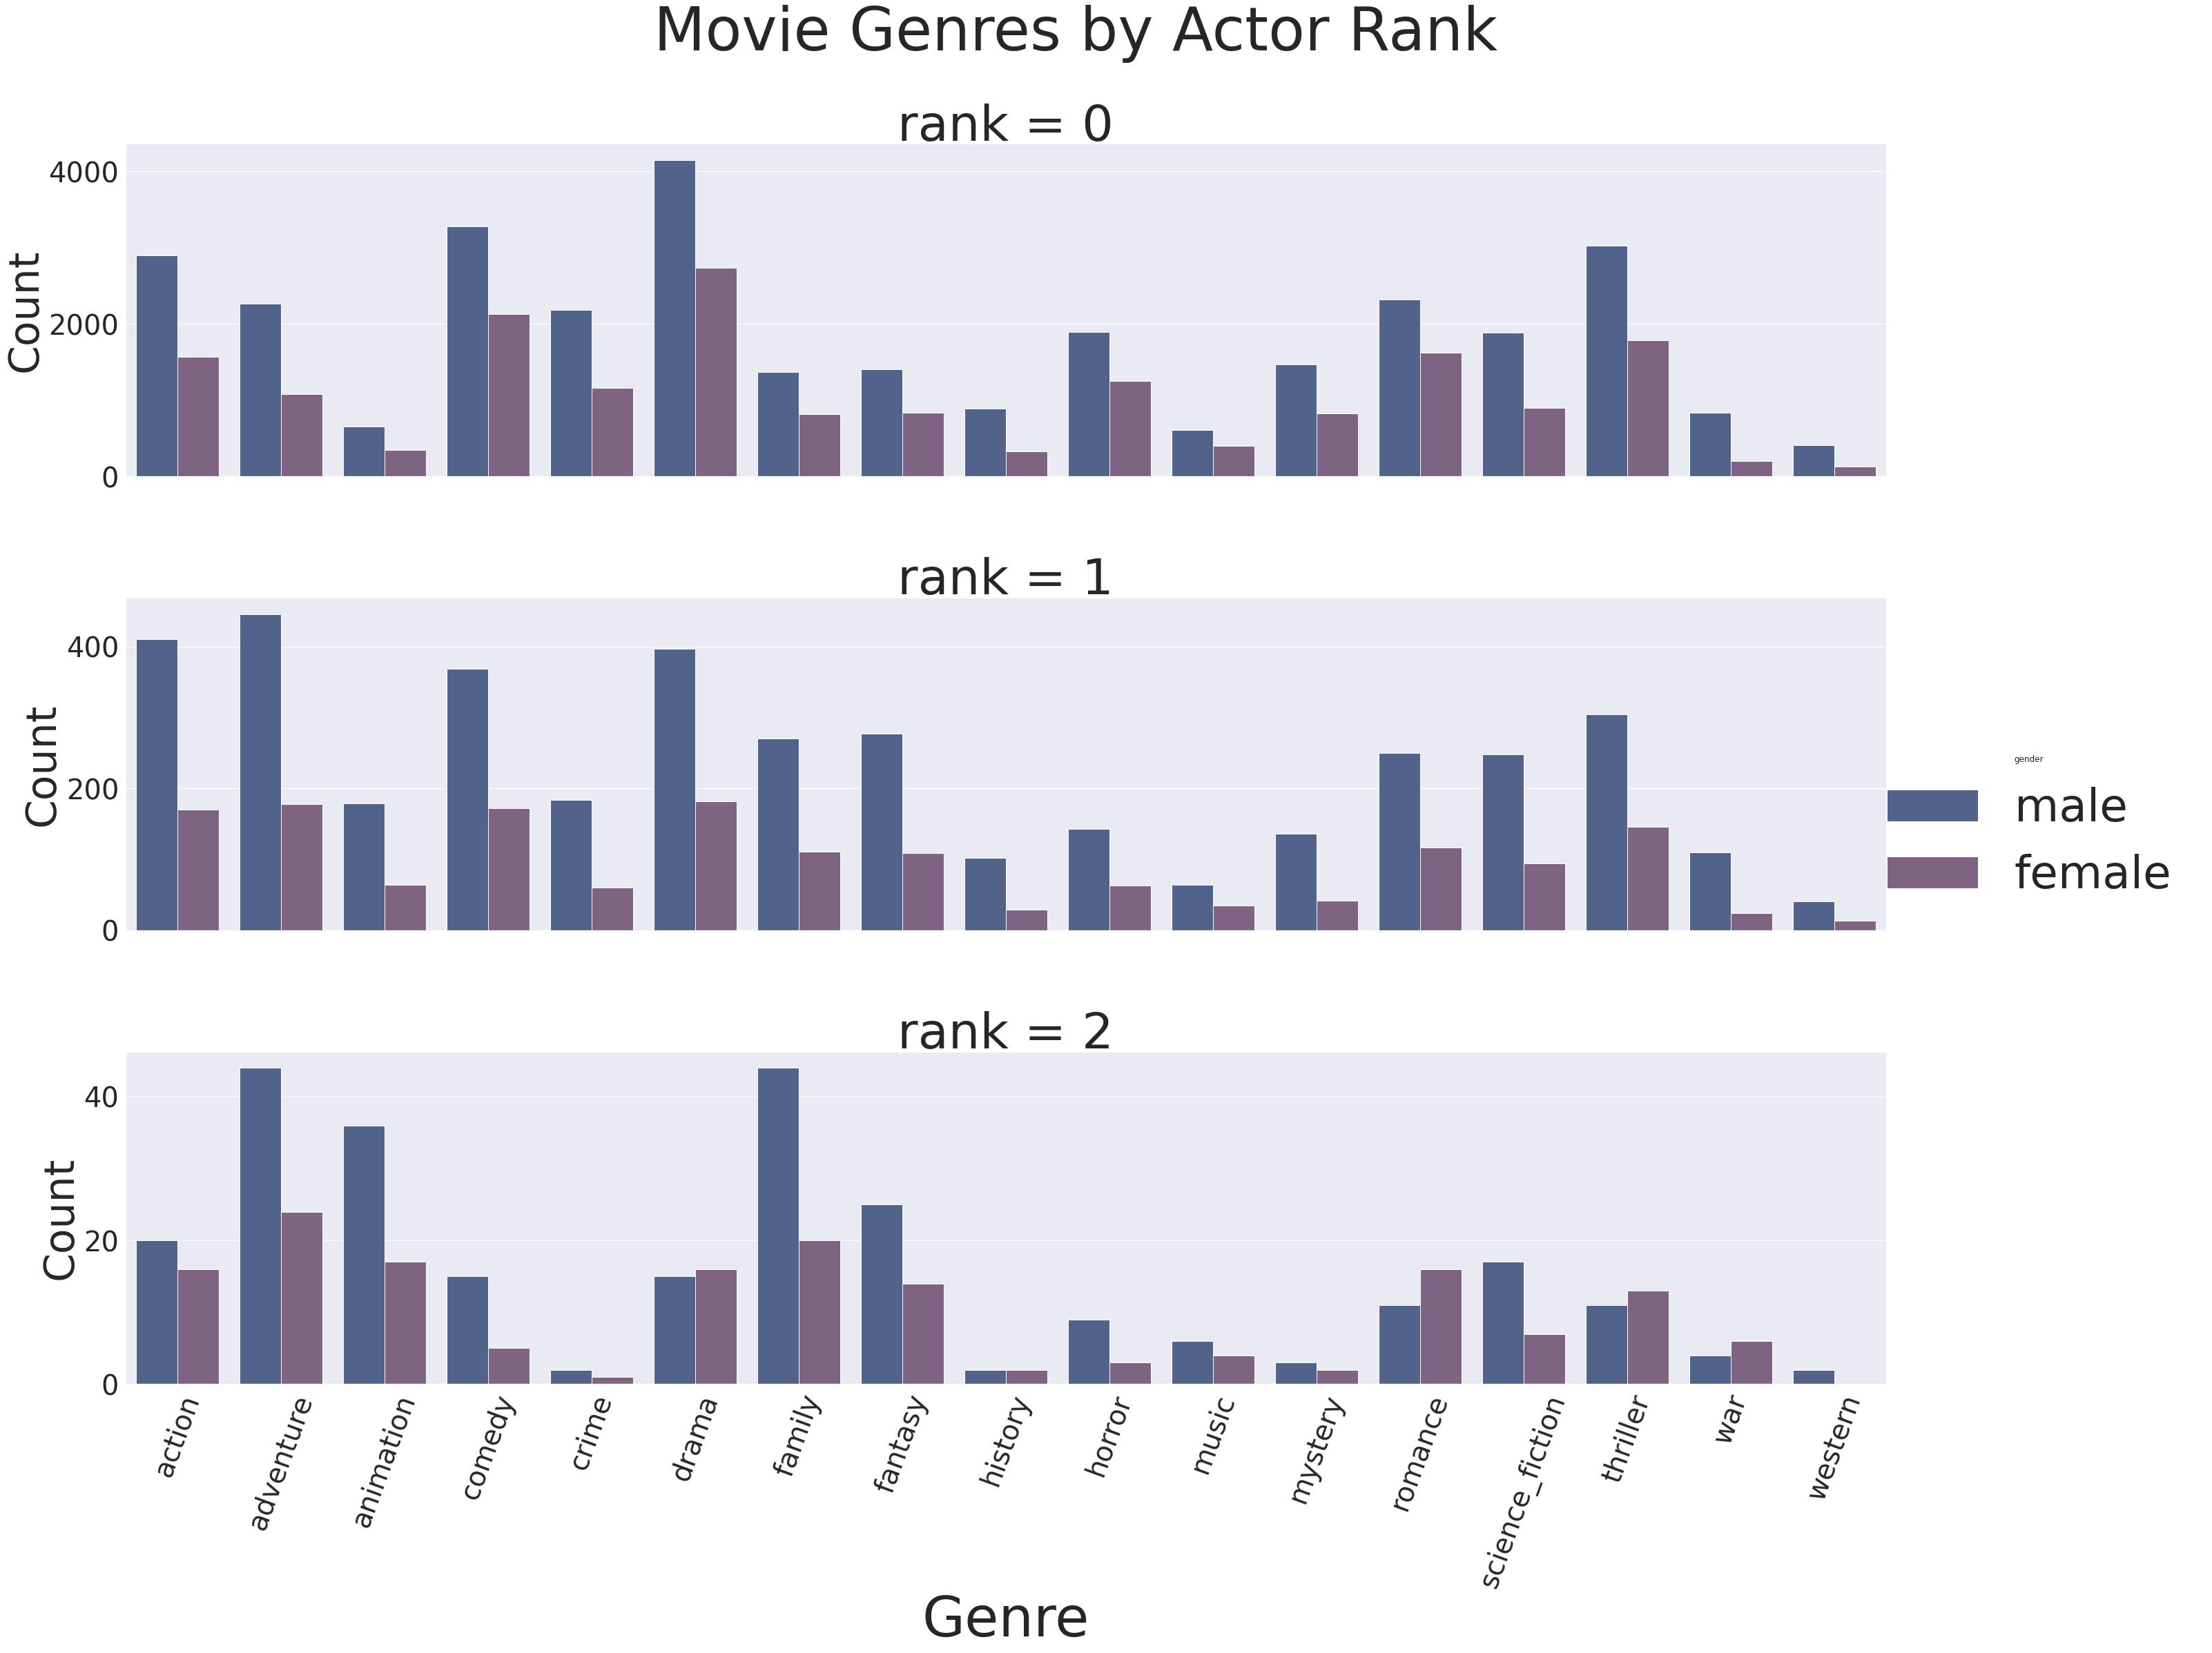

In [46]:
# plot distribution of genres by actor rank 

sns.set(font_scale=6)
g = sns.catplot(x='genre', hue='gender', row='rank', data=gender_rank_df, kind='count', 
            sharey=False, height=10, aspect=4, palette=sns.xkcd_palette(mp.my_colors))

g.set_xticklabels(fontsize=40, rotation=70)
g.set_yticklabels(fontsize=40)

g.set_xlabels(fontsize=40)
g.set_ylabels('Count', fontsize=60)

plt.xlabel('Genre', fontsize=80)

g.fig.suptitle('Movie Genres by Actor Rank', y=1.03);

The genres of adventure, animation, and family are the most dominant ones among the rank 2 actors.<br>
Rank 0 actors tend to have roles in action, comedy, drama, and thriller movies.<br>
These two observations can be seen in the previous plot, as well.

The proportion of female actors by genre is fairly consistant in ranks 0 and 1.<br>
They outnumber the male actors in the genres of drama, romance, thriller, and war.

In [47]:
# extract rank 2 female actors in a war movie
_df = actor_df[actor_df['person_id'].isin(
    elite_df[(elite_df['war'] > 0) & (elite_df['gender'] == 'female')].index)]
# sort by revenue and drop movies not in genre category
_df[_df['war'] > 0].drop(genre_lst, axis=1).sort_values('revenue', ascending=False)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
13204,7642,Barbara O'Neil,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,29.413335,1,6,19.986,1939,233,1,7.9,2207
13993,8725,Olivia de Havilland,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.455649,1,2,19.986,1939,233,0,7.9,2207
15782,10538,Vivien Leigh,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,26.108681,1,0,19.986,1939,233,0,7.9,2207
17001,11494,Evelyn Keyes,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.066867,1,7,19.986,1939,233,1,7.9,2207
17002,11495,Ann Rutherford,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,22.116813,1,8,19.986,1939,233,0,7.9,2207
17003,11498,Hattie McDaniel,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,44.512892,1,4,19.986,1939,233,1,7.9,2207
13994,8725,Olivia de Havilland,43884,The Charge of the Light Brigade,5.044305e+07,2.212414e+07,2.831890e+07,20.304318,1,1,5.895,1936,115,0,6.7,33


There were many rank 2 female actors in Gone with the Wind.

In [48]:
# extract rank 2 female actors in a drama movie
_df = actor_df[actor_df['person_id'].isin(
    elite_df[(elite_df['drama'] > 0) & (elite_df['gender'] == 'female')].index)]
# sort by revenue and drop movies not in genre category
_df[_df['drama'] > 0].drop(genre_lst, axis=1).sort_values('revenue', ascending=False)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
17002,11495,Ann Rutherford,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,22.116813,1,8,19.986,1939,233,0,7.9,2207
17003,11498,Hattie McDaniel,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,44.512892,1,4,19.986,1939,233,1,7.9,2207
13993,8725,Olivia de Havilland,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.455649,1,2,19.986,1939,233,0,7.9,2207
15782,10538,Vivien Leigh,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,26.108681,1,0,19.986,1939,233,0,7.9,2207
17001,11494,Evelyn Keyes,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.066867,1,7,19.986,1939,233,1,7.9,2207
13204,7642,Barbara O'Neil,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,29.413335,1,6,19.986,1939,233,1,7.9,2207
36293,107445,Ann Gillis,3170,Bambi,4.183765e+09,1.342198e+07,4.170343e+09,15.502029,1,6,23.122,1942,70,1,7.0,3691
17006,11503,Cammie King,3170,Bambi,4.183765e+09,1.342198e+07,4.170343e+09,8.024805,1,3,23.122,1942,70,1,7.0,3691
13835,8535,Gloria Stuart,597,Titanic,2.948799e+09,3.196471e+08,2.629152e+09,87.377564,1,5,33.029,1997,194,1,7.8,16794
36843,121640,Angela Cartwright,15121,The Sound of Music,2.360262e+09,6.762118e+07,2.292641e+09,12.550566,1,8,18.195,1965,175,0,7.7,1971


The drama genre holds a little more variety, as there are more actors with credits in those movies.

In [49]:
# extract rank 2 female actors in a thriller movie
_df = actor_df[actor_df['person_id'].isin(
    elite_df[(elite_df['thriller'] > 0) & (elite_df['gender'] == 'female')].index)]
# sort by revenue and drop movies not in genre category
_df[_df['thriller'] > 0].drop(genre_lst, axis=1).sort_values('revenue', ascending=False)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
13886,8613,Lee Fierro,578,Jaws,2.266466e+09,3.370905e+07,2.232757e+09,46.341814,1,8,27.558,1975,124,1,7.6,6141
39904,1251069,Nathalie Emmanuel,337339,The Fate of the Furious,1.307617e+09,2.638954e+08,1.043722e+09,28.027954,1,8,30.896,2017,136,0,6.9,7223
39229,1030261,Bérénice Marlohe,37724,Skyfall,1.236987e+09,2.231699e+08,1.013818e+09,33.438058,1,5,24.466,2012,143,0,7.1,11539
15220,9919,Claudine Auger,660,Thunderball,1.146060e+09,4.464253e+07,1.101418e+09,24.627474,1,1,25.442,1965,130,0,6.6,1232
15223,9921,Luciana Paluzzi,660,Thunderball,1.146060e+09,4.464253e+07,1.101418e+09,28.504350,1,3,25.442,1965,130,0,6.6,1232
15225,9924,Molly Peters,660,Thunderball,1.146060e+09,4.464253e+07,1.101418e+09,23.743130,1,6,25.442,1965,130,0,6.6,1232
15214,9909,Shirley Eaton,658,Goldfinger,1.036453e+09,2.074879e+07,1.015704e+09,27.688454,1,3,21.336,1964,110,0,7.4,2086
15215,9910,Tania Mallet,658,Goldfinger,1.036453e+09,2.074879e+07,1.015704e+09,23.340657,1,4,21.336,1964,110,0,7.4,2086
8213,3420,Armelia McQueen,251,Ghost,9.996018e+08,4.354701e+07,9.560548e+08,38.514138,1,8,17.725,1990,127,1,7.1,3395
6402,2405,Audrey Tautou,591,The Da Vinci Code,9.786962e+08,1.593302e+08,8.193659e+08,29.769263,1,1,24.421,2006,149,0,6.7,6129


Six of these rank 2 actors were in Bond films.<br>
Once again, the lack of observations in some of the genres allows the particular movies to dictate who's in the list.

In [50]:
# extract rank 2 female actors in a romance movie
_df = actor_df[actor_df['person_id'].isin(
    elite_df[(elite_df['romance'] > 0) & (elite_df['gender'] == 'female')].index)]
# sort by revenue and drop movies not in genre category
_df[_df['romance'] > 0].drop(genre_lst, axis=1).sort_values('revenue', ascending=False)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
13993,8725,Olivia de Havilland,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.455649,1,2,19.986,1939,233,0,7.9,2207
15782,10538,Vivien Leigh,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,26.108681,1,0,19.986,1939,233,0,7.9,2207
17001,11494,Evelyn Keyes,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,23.066867,1,7,19.986,1939,233,1,7.9,2207
17002,11495,Ann Rutherford,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,22.116813,1,8,19.986,1939,233,0,7.9,2207
17003,11498,Hattie McDaniel,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,44.512892,1,4,19.986,1939,233,1,7.9,2207
13204,7642,Barbara O'Neil,770,Gone with the Wind,7.377968e+09,7.374714e+07,7.304220e+09,29.413335,1,6,19.986,1939,233,1,7.9,2207
13835,8535,Gloria Stuart,597,Titanic,2.948799e+09,3.196471e+08,2.629152e+09,87.377564,1,5,33.029,1997,194,1,7.8,16794
33121,68653,Claire Du Brey,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,57.476882,1,3,23.993,1950,74,1,7.0,4411
37861,179371,Rhoda Williams,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,19.641745,1,4,23.993,1950,74,1,7.0,4411
32962,67289,Eleanor Audley,11224,Cinderella,2.895187e+09,3.185249e+07,2.863335e+09,44.261005,1,1,23.993,1950,74,1,7.0,4411


Again, the big movies dominate the rank 2 actors.

In [51]:
# observe percentage of all actors who are male
(df['gender'].value_counts() / df.shape[0])[0] * 100

60.805610194133244

In [52]:
# observe percentage of rank 0 actors who are male
(df[df['rank'] == 0]['gender'].value_counts() / df[df['rank'] == 0].shape[0])[0] * 100

60.26798441509076

In [53]:
# observe percentage of rank 1 actors who are male
(df[df['rank'] == 1]['gender'].value_counts() / df[df['rank'] == 1].shape[0])[0] * 100

66.47673314339981

In [54]:
# observe percentage of rank 2 actors who are male
(df[df['rank'] == 2]['gender'].value_counts() / df[df['rank'] == 2].shape[0])[0] * 100

58.119658119658126

The genders are distributed in a similar proportion in ranks 0 as they are in the general data population.<br>
It is more common for rank 1 actors to be male, compared to the other ranks.<br>
Female actors are a larger percentage of rank 2 actors than they are of ranks 0 or 1 actors.<br>

The dataset could use more observations to reveal better insights.<br>
Also, the actors could be divided more evenly to lessen the effect of big movies dominating the analysis.<br>
This work should continue along these lines, until the actors become the distinctions in the sorted data.